In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import sys
sys.path.insert(0, "C:\\Users\\billy\\OneDrive\\Documents\\Python Scripts\\1. Portfolio\\predict-breast-cancer\\predict-breast-cancer")
import custom_funcs as cf

# Predicting breast cancer

* Anticipating and proactively addressing health challenges is a critical aspect of modern healthcare as early detection often leads to improved patient outcomes. For instance, if healthcare providers can diagnose cancer earlier, treatment strategies can be implemented before the progression of the disease. The goal of this project was, therefore, to predict breast cancer diagnosis using cell nuclei characteristics extracted from images of breast tissue.

* This workbook details the exploration of the [Breast Cancer Wisconsin (Diagnostic) dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic). This is a real world multivariate dataset containing $30$ continuous features and a binary diagnosis target.

# Summary

Descriptive statistics and frequency distributions are computed for all variables during data exploration & cleansing. Key observations and actions are outlined below.

1. Erroneous Data
   
    * No duplicate rows are present.
    
    * Data exploration did not reveal any errors.
  
2. Distributions

    * All distributions are non-normal with a positive skew.

    * Kurtosis was not formally measured. However, outliers appear to be present for the following variables: perimeter error, area error and fractal dimension error.

    * The cardinality of the target variable is $2$. There is a slight class imbalance with $62.7\%$ of instances corresponding to a cancer diagnosis.

3. Missing values

    * No missing values are present.
  
4. Outliers

    * The outliers in the 'perimeter error', 'area error' and 'fractal dimension' error column are left untouched. Instead their influence on later modelling will be assessed. If a value significantly affects outcomes, it may be excluded.

# Import raw data
* The raw data contains $30$ predictive features and a binary classification target. There are a total of $569$ records.

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
raw_df = pd.concat([data["data"], data["target"]], axis=1)
raw_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Dimensions
print(f"Number of rows: {raw_df.shape[0]}")
print(f"Number of columns: {raw_df.shape[1]}")

Number of rows: 569
Number of columns: 31


# Data exploration

## Variable types


**1) Categorical variables**

* Nominal variables = Categories or groups that have *no* inherent order or ranking.
  
* Ordinal variables = Categories or groups with a meaningful order or ranking.

    Note: It differs from the interval scale and ratio scale by not having category widths that represent equal increments of the underlying attribute

| Variable | Type  |
| -------- | ----- |
| Target | Nominal |

**2) Continuous variables**

* Interval variables = A quantitative scale with a meaningful order or ranking *and* equal distances between adjacent values.

    Note: It differs from a ratio variable in that zero is an arbitrary point, not a complete absence of the variable.

* Ratio variables = A quantitative scale with a meaningful order or ranking *and* equal distances between adjacent values *and* a true zero.

| Variable | Type  |
| -------- | ----- |
| Mean radius | Ratio |
| Mean texture | Ratio |
| Mean perimeter | Ratio |
| Mean area | Ratio |
| Mean smoothness | Ratio |
| Mean compactness | Ratio |
| Mean concavity | Ratio |
| Mean concave points | Ratio |
| Mean symmetry | Ratio |
| Mean fractal dimension | Ratio |
| Radius error | Interval |
| Texture error | Interval |
| Perimeter error | Interval |
| Area error | Interval |
| Smoothness error | Interval |
| Compactness error | Interval |
| Concavity error | Interval |
| Concave points error | Interval |
| Symmetry error | Interval |
| Fractal dimension error| Interval |
| Worst radius | Ratio |
| Worst texture | Ratio |
| Worst perimeter | Ratio |
| Worst area | Ratio |
| Worst smoothness | Ratio |
| Worst compactness | Ratio |
| Worst concavity | Ratio |
| Worst concave points | Ratio |
| Worst symmetry | Ratio |
| Worst fractal dimension | Ratio |

## Data types
* The data type for the 'target' feature is updated to object.

In [4]:
# Data types
display(raw_df.info())
print("\n")
display(raw_df.dtypes.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

None

float64    30
int32       1
Name: count, dtype: int64

In [5]:
# Update dtypes
raw_df['target'] = raw_df['target'].astype('object')

## Summary statistics

**_1) Continuous variables_**

* The mean and median values differ substantially for some variables (e.g. worst area). This suggests not all continuous variables exhibit symmetric frequency distributions.

In [6]:
raw_df.select_dtypes(include=['number']).describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**_2) Categorical variables_**

* As expected, the number of unique values in the 'target' column is $2$. 

In [7]:
raw_df.select_dtypes(include=['object']).describe()

,target
count,569
unique,2
top,1
freq,357


## Frequency distributions

**_1) Continuous variables_**

* All distributions are non-normal with a positive skew.

    Note: [Skewness](https://en.wikipedia.org/wiki/Skewness) is a measurement of the distortion of symmetrical distribution or asymmetry in a data set. A standard normal distribution has a skewness of $0$.

* Kurtosis was not formally measured. However, outliers appear to be present for the following variables: perimeter error, area error and fractal dimension error.

    Note: [Kurtosis](https://en.wikipedia.org/wiki/Kurtosis) is a measure of the "tailedness" of a probability distribution. High kurtosis indicates there is an increased likelihood of extreme values (outliers). A standard normal distribution has a kurtosis of $3$.

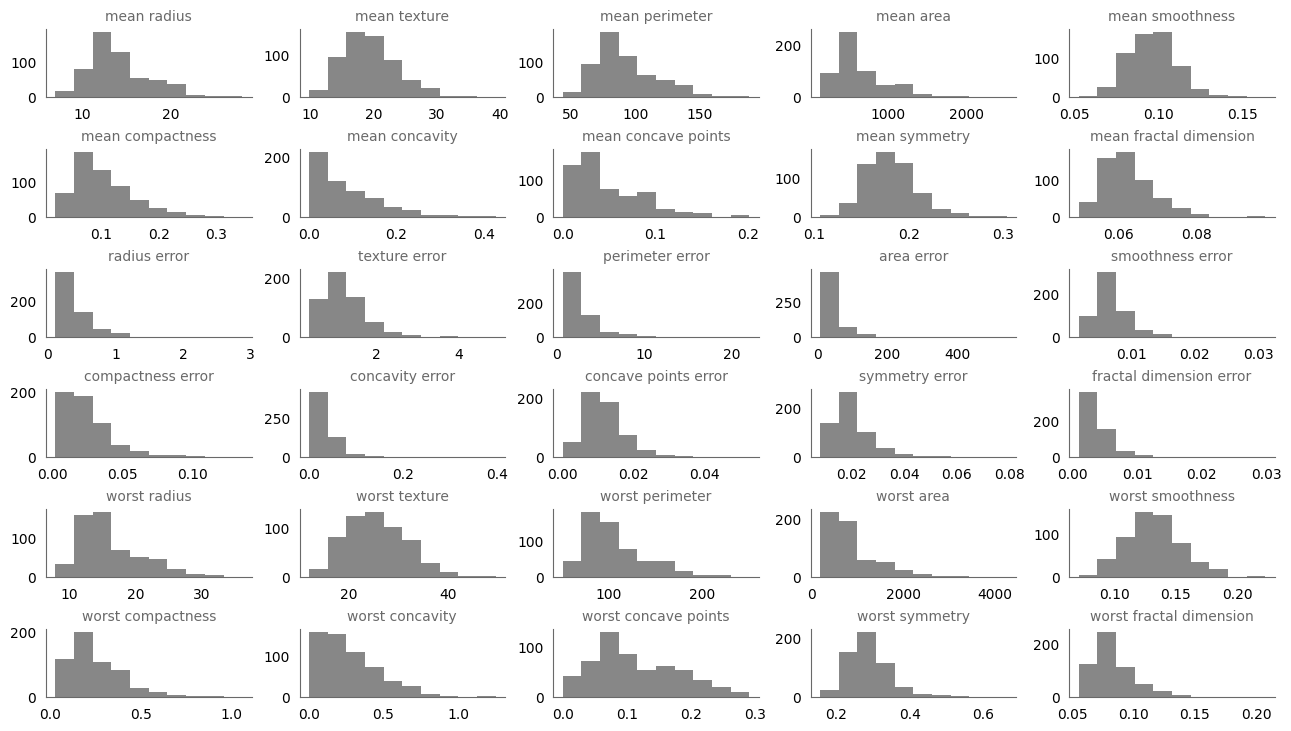

In [8]:
fig, axes = plt.subplots(
    nrows=6, ncols=5, constrained_layout=True, figsize=(6.4*2, 4.8*1.5))
i = 0
axes = axes.flatten()
for col in raw_df.select_dtypes(include=['number']).columns:
    axes[i].hist(raw_df[col], color='dimgray', alpha=0.8, label='')
    axes[i].set_title(col, fontsize=10, color='dimgray')
    i += 1

for ax in axes:
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

**_2) Categorical variables_**
* The cardinality of the target variable is $2$.

* There is a slight class imbalance with $62.7\%$ of instances corresponding to a cancer diagnosis.

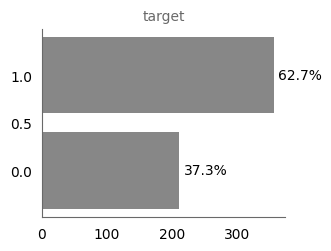

In [9]:
# Frequency plots
fig, axes = plt.subplots(
    nrows=1, ncols=1, constrained_layout=True, figsize=(6.4/2, 4.8/2)
)
counts = raw_df['target'].value_counts()
percs = raw_df['target'].value_counts(normalize=True)
rects = axes.barh(counts.index, counts.values,
                  color='dimgray', alpha=0.8)
axes.bar_label(rects, labels=[str(round(x*100, 1)) +
                              '%' for x in percs.values], padding=3)

axes.tick_params(bottom=False, left=False)
axes.grid(False)
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')
axes.set_title('target', fontsize=10, color='dimgray');

## Missing values
* No missing values are present.

In [10]:
# Identify columns with missing values
nan_summary = pd.concat(
    [raw_df.isnull().sum()[(raw_df.isnull().sum() > 1)],
     raw_df.isnull().sum()[(raw_df.isnull().sum() > 1)] / raw_df.shape[0]],
    axis=1, keys=['Count', '%']
)
display(nan_summary)

# Count rows with more than one missing value
rows_with_multiple_missing = raw_df[raw_df.isnull().sum(axis=1) > 1]
print(f"Number of rows with more than one missing value: {len(rows_with_multiple_missing)}")

,Count,%


Number of rows with more than one missing value: 0


# Data cleansing

## Erroneous data
* No duplicate rows are present.

* Data exploration did not reveal any errors or differences in schema/formatting.

In [11]:
raw_df[raw_df.duplicated()]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target


## Train/test split
* The raw data is divided using an 80/20 train/test split.

In [12]:
# Divide train/test data
X_cols = [x for x in raw_df.columns if x != 'target']
X_train, X_test, y_train, y_test = train_test_split(
    raw_df[X_cols], raw_df['target'], test_size=0.2, random_state=42
)
train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

print(f'Train set dimensions: {train_df.shape}')
print(f'Test set dimensions: {test_df.shape}')

Train set dimensions: (455, 31)
Test set dimensions: (114, 31)


## Missing value imputation
* No missing values are present.

In [13]:
# Missing values in the training data
train_nan_summary = pd.concat([train_df.isnull().sum()[(train_df.isnull().sum() > 1)],
                               train_df.isnull().sum()[(train_df.isnull().sum() > 1)] / train_df.shape[0]],
                              axis=1, keys=['Count', '%']
                             )

# Missing values in the test data
test_nan_summary = pd.concat([test_df.isnull().sum()[(test_df.isnull().sum() > 1)],
                               test_df.isnull().sum()[(test_df.isnull().sum() > 1)] / test_df.shape[0]],
                              axis=1, keys=['Count', '%']
                             )
print(f'\n-----------------------------Missing values in training set-----------------------------')
display(train_nan_summary)
print(f'\n-----------------------------Missing values in test set-----------------------------')
display(test_nan_summary)


-----------------------------Missing values in training set-----------------------------


,Count,%



-----------------------------Missing values in test set-----------------------------


,Count,%


## Outliers
* The outliers in the 'perimeter error', 'area error' and 'fractal dimension' error column are left untouched. Instead a baseline model will be trained and optimised with all available training data. If performance is OK, there is no need to make amendments. If a value has a significant and detrimental impact on performance, it may be excluded.

    *Note: The distribution are not normal so outliers cannot be excluded based on z-score.*

* If an extreme point does have a strong negative impact on predictive performance several mitigration strategies could be utilised:

     1. Trimming:
        * If the points are truly anomalous, and not worth incorporating, they can be removed.
        * Risk losing information.
    
    2. Winsorization
        * Cap the data at a threshold
        * A 90% winorization:
            * Cap the bottom 5% of values at the 5th percentile
            * Cap the top 5% of values at the 95th percentile

# Save

In [14]:
train_df.to_csv('../data/cleaned/clean_train.csv', index=False)
test_df.to_csv('../data/cleaned/clean_test.csv', index=False)

##### 2) Association between two categorical variables

**a) Chi-squared & Cramer's V**

* Together these tools can be used to evaluate whether two categorical variables are <u>independent</u> and the strength of <u>association</u>.

**_Chi-squared_**

1. What it Measures:

    * Whether two categorical variables are <u>independent</u>.
       
    * Goodness of fit (i.e. how well a model fits observations).

2. Assumptions:

    * No distribution of the variables is assumed (i.e. non-parametric).

    * The data in the cells should be frequencies, or counts of cases.
  
    * The levels (or categories) of the variables are mutually exclusive.

4. Hypotheses:

   * Null hypothesis $H_0$: There is no association or independence between the two categorical variables.
  
   * Alternate hypothesis $H_1$: There is a significant association or dependence between the two categorical variables.

6. Test statistic:

    * The test statistic is chi-squared distributed under the null hypothesis $H_0$

        $\chi^2  \sim \chi^2(k)$
    
        *Where k is the number of degrees of freedom*
    
        $ \chi^2 = \sum_i \frac{(O_i-E_i)^2}{E_i}$

        *Where $O_i$ is the observed value of interest and $E_i$ is the expected value.*

7. Steps:

    * The test statistic is calculated using a contingency table.

    * If the p-value of the test statistic is below the chosen threshold, there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of the contingency table.

[Source](https://en.wikipedia.org/wiki/Chi-squared_test)

**_Cramer's V_**

1. What it Measures:

    * An effect size measurement for the chi-square test of independence.

        *Note: For smaller sample sizes or tables with a small number of cells, alternatives like the phi coefficient may be more suitable.*

    * It measures strength of <u>association</u> between two categorical variables
  
1. Interpretation:

    $V \in [0, 1]$

    *A value close to $0$ indicates a weak association, while a value close to $1$ indicates a strong association.*

[Source](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

## Feature engineering

### Feature selection
* No features are dropped. However, PCA is conducted after splitting the data.

In [ ]:
# Feature view
feature_cols = [x for x in clean_df.columns if x!='target']
clean_features_df = clean_df.loc[:, feature_cols]
clean_features_df.head()

In [ ]:
# Target view
target_cols = ['target']
clean_target_df = clean_df.loc[:, target_cols]
clean_target_df.head()

### Train/test split
* All transformations where data leakage could occur (i.e. PCA) are conducted after the train/test split.

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(clean_features_df, clean_target_df, test_size=0.33, random_state=0)

# Reset index
list_of_dataframes = [X_train, X_test, y_train, y_test]
for df in list_of_dataframes:
    df.reset_index(drop=True, inplace=True)

# Print dimensions
print(f"X_train: {X_train.shape[0]} rows, {X_train.shape[1]} cols")
print(f"y_train: {y_train.shape[0]} rows, {y_train.shape[1]} cols")
print("\n")
print(f"X_test: {X_test.shape[0]} rows, {X_test.shape[1]} cols")
print(f"y_test: {y_test.shape[0]} rows, {y_test.shape[1]} cols")

### Transform continuous variables

* The correlation matrix displaying Pearson's correlation coefficient between each predictive feature indicates multicollinearity.

    *Note: Multicollinearity is when two or more independent variables (i.e. predictive features) are highly correlated, meaning they are <u>linearly</u> dependent on each other.*

* This makes it difficult to isolate the individual effects of each variable on the dependent variable. In regression tasks, this leads to problems assessing feature importance due to misleading p-values and unstable coefficients with large confidence intervals.

* Here, PCA is used to address multicollinearity. This has the added advantage of reducing dimensionality.

**Step 4: Apply PCA to test data**

* The standardised test data is projected onto the same low-dimension space as that of the training data.

In [ ]:
X_test_pca = pca.transform(X_test_standardised)
X_test_pca_df = pd.DataFrame(X_test_pca)
X_test_pca_df.head()

print(f"X_test_pca_df: {X_test_pca_df.shape[0]} rows, {X_test_pca_df.shape[1]} cols")

## Save

In [ ]:
train_df = pd.concat([X_train_pca_df, y_train], axis=1)
test_df = pd.concat([X_test_pca_df, y_test], axis=1)

In [ ]:
train_df.to_csv(cf.file_directory('cleaned') + 'train_df.csv', index=False)
test_df.to_csv(cf.file_directory('cleaned') + 'test_df.csv', index=False)